 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8889/notebooks/Downloads/instant-gratification/first_model.ipynb#Random-forest" data-toc-modified-id="Random-forest-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="http://localhost:8889/notebooks/Downloads/instant-gratification/first_model.ipynb#KNN" data-toc-modified-id="KNN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>KNN</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Downloads/instant-gratification/first_model.ipynb#KNN" data-toc-modified-id="KNN-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="http://localhost:8889/notebooks/Downloads/instant-gratification/first_model.ipynb#KNN-+-NCA" data-toc-modified-id="KNN-+-NCA-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>KNN + NCA</a></span></li></ul></li><li><span><a href="http://localhost:8889/notebooks/Downloads/instant-gratification/first_model.ipynb#Discriminant-Analysis" data-toc-modified-id="Discriminant-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Discriminant Analysis</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Downloads/instant-gratification/first_model.ipynb#LDA" data-toc-modified-id="LDA-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LDA</a></span></li><li><span><a href="http://localhost:8889/notebooks/Downloads/instant-gratification/first_model.ipynb#QDA" data-toc-modified-id="QDA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>QDA</a></span></li></ul></li><li><span><a href="http://localhost:8889/notebooks/Downloads/instant-gratification/first_model.ipynb#PCA" data-toc-modified-id="PCA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PCA</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Downloads/instant-gratification/first_model.ipynb#+-QDA" data-toc-modified-id="+-QDA-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>+ QDA</a></span></li></ul></li><li><span><a href="http://localhost:8889/notebooks/Downloads/instant-gratification/first_model.ipynb#Submission" data-toc-modified-id="Submission-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, auc, roc_auc_score

from sklearn.model_selection import cross_validate, train_test_split

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt


pd.options.display.max_columns = None
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Columns: 258 entries, id to target
dtypes: float64(255), int64(2), object(1)
memory usage: 516.0+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131073 entries, 0 to 131072
Columns: 257 entries, id to gamy-white-monster-expert
dtypes: float64(255), int64(1), object(1)
memory usage: 257.0+ MB


In [5]:
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,

In [6]:
test.head(20)

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,

In [193]:
train['wheezy-copper-turtle-magic'].head()

0     99
1     52
2    230
3     78
4    497
Name: wheezy-copper-turtle-magic, dtype: int64

In [55]:
''' notes
wheezy-copper-turtle-magic va de 0 a 511
pour wheezy-copper-turtle-magic=100, il y a des histo qui vont de -10 a 10 et d'autres qui vont de -3 a 3
-> permet de sélectionner un groupe de variables
'''

' notes\nwheezy-copper-turtle-magic va de 0 a 511\n'

In [147]:
var = [col for col in train.columns[1:-1] if col not in ['wheezy-copper-turtle-magic'] ]

In [8]:
b = train.loc[train['wheezy-copper-turtle-magic']==100, :]

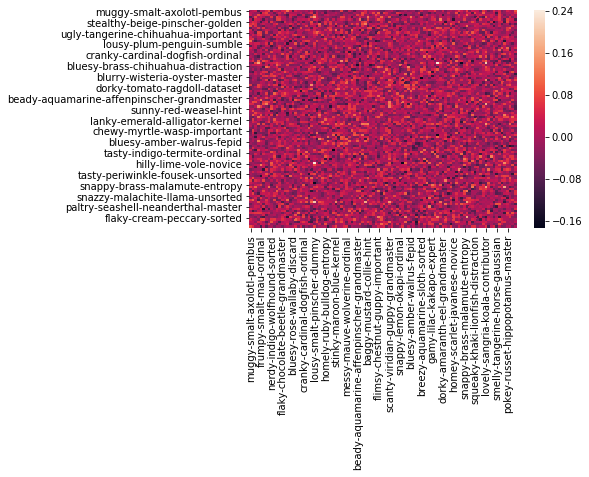

In [172]:
import seaborn as sns
corr = b[var[0:100]].corr().replace(1,0)
sns.heatmap(corr)

In [9]:
b.shape

(527, 258)

In [192]:
b.iloc[range(1, 500),1:].transpose().corr().replace(1,0)

,2562,2780,2864,2870,3187,3786,3855,4546,4924,5258,6291,6442,6570,6843,7267,8137,10329,11029,12898,15329,15331,15426,15629,16191,16318,16667,16951,17254,17451,17872,17996,18705,18851,19715,21273,21319,21465,21485,21486,21986,22060,22521,22883,23282,23972,24184,24773,25076,25568,26927,27252,27309,27479,27559,27824,28103,28239,28694,28738,29171,31721,32034,32154,32550,32751,33505,33655,33659,34169,34186,34975,36386,36466,36743,37656,37714,38270,38999,39134,39520,39718,40087,40716,41129,41157,41243,41297,41497,41516,42295,42375,43240,43817,44237,44505,45325,46135,46234,46251,46616,47182,48106,48214,49057,49148,49501,52039,52153,53521,54544,54950,55487,55505,55522,55649,55743,56221,56400,56764,57127,58403,58512,58751,59325,60957,61046,61288,62242,64826,64918,65278,66016,66224,66719,67003,67073,68093,68757,69233,69637,69840,71410,72022,72554,72815,73016,73259,73879,73973,73994,75268,76330,76441,77276,77736,77767,77962,78976,79689,80534,80845,80980,81685,81871,82799,83175,83330,83962,84138,84535,84718,84768,85255,85882,85915,86097,87321,88042,88718,89283,89699,89812,90317,90533,90808,91147,92026,92866,93630,93927,95160,96002,96239,97549,97976,98090,98111,99445,99485,101579,101796,102004,102159,102356,102750,103079,104082,104431,104917,106547,106917,107551,107852,108764,108864,109035,110155,110324,110353,110429,110657,110663,110935,111502,112498,113038,113194,114063,114502,114562,114607,115557,115791,116916,117097,118104,118366,120326,120966,121271,121970,122078,122757,123063,123785,124059,124635,125212,125452,125475,125615,125935,126740,127010,127093,127189,127487,127722,128317,128607,128959,130419,132857,132923,133899,134133,134388,134426,134610,134851,135794,135961,136898,137752,138372,139088,139333,139622,139835,140085,140277,140612,140961,142297,142675,143910,143968,144112,144539,144826,145393,146176,146601,146644,147103,149281,149713,150481,150921,151555,152132,152252,152326,152475,152528,152702,153897,154269,154598,155100,155219,155415,156992,158194,159176,159516,160205,160293,160920,161102,161180,161251,161810,162343,162792,163030,163782,164050,164189,164528,165105,165869,166147,167567,167625,168009,169608,170762,170895,171079,171201,171688,171728,174328,174886,175546,175553,175907,176285,176854,176959,177192,177554,177605,181534,181694,181706,181788,182499,182516,183165,183361,183612,183886,184351,185392,186230,187677,188311,188690,188988,190330,190840,190871,191317,191921,192242,192247,192821,194093,194128,194231,194527,194584,194651,195033,195416,195430,195480,195953,196748,197032,197209,197377,197614,198165,198341,198369,198966,200035,201292,202155,202999,203605,204055,204357,204372,204880,205122,205757,206007,206968,209669,210420,210659,211439,211654,212415,212940,214383,214716,214791,215020,215276,215936,216150,216318,216660,217670,217986,218055,219334,219845,220093,220506,220510,222216,222737,223901,224385,224508,225360,225613,226809,226963,227095,227330,227651,228482,228875,229023,229601,229731,229883,230370,230778,231374,232971,233207,233458,233783,234216,234539,234657,235371,235374,235646,235857,236536,237265,237394,237562,237628,237980,238509,239444,239772,240049,240900,240909,240923,241634,241653,241718,241719,242098,242118,243032,243653,243807,243945,244350,244488,245191,245354,246784,247149,247393,247839
2562,0.000000,0.925888,0.923905,0.939676,0.943834,0.939778,0.941816,0.928722,0.950968,0.927895,0.931735,0.944540,0.930300,0.931324,0.937345,0.938467,0.923219,0.930155,0.930130,0.937964,0.935768,0.920448,0.920954,0.937734,0.943080,0.938714,0.923297,0.914801,0.932769,0.933028,0.930698,0.920925,0.945947,0.933971,0.925211,0.943129,0.942027,0.941758,0.926320,0.940588,0.952435,0.936405,0.941174,0.939902,0.934759,0.926237,0.930416,0.934540,0.932975,0.931432,0.942759,0.947060,0.937905,0.936958,0.931238,0.933557,0.932643,0.931151,0.946801,0.912605,0.925659,0.946159,0.944816,0.946273,0.922664,0.935428,0.934804,0.937755,0.931057,0.947719,0.936434,0.933229,0.941088,0.924887,0.944754,0.937919,0.915547,0.932591,0.947432,0.932

In [198]:
np.random.normal(0, 1, 500)[:4]

array([-1.16601281, -1.29897097,  0.82353811,  0.10513596])

In [212]:
#plt.hist(np.random.normal(0, 1, 500), bins=100)
#plt.ylabel('count')

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


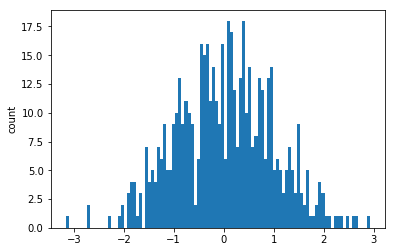

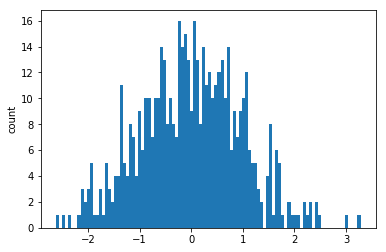

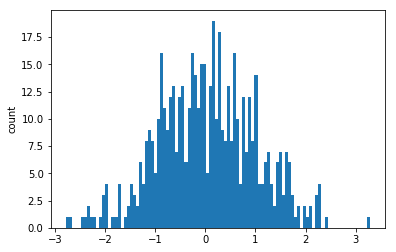

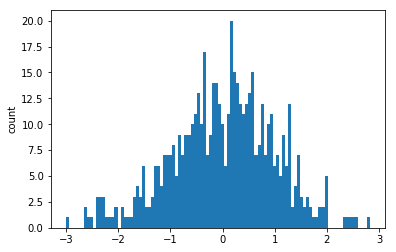

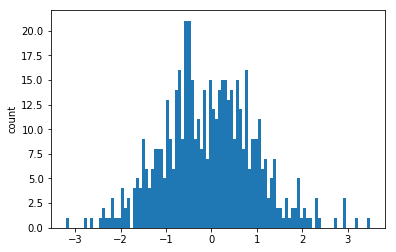

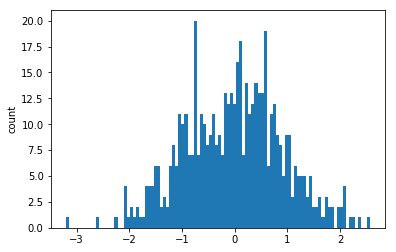

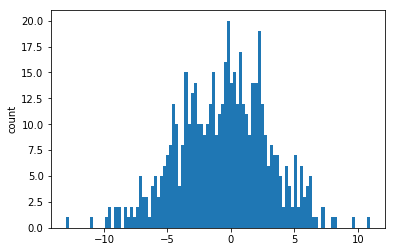

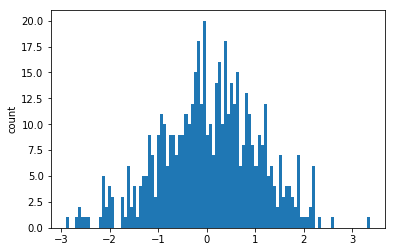

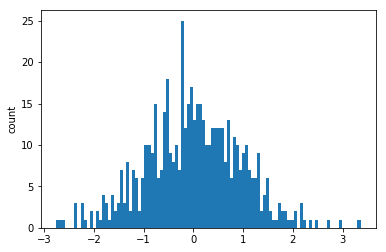

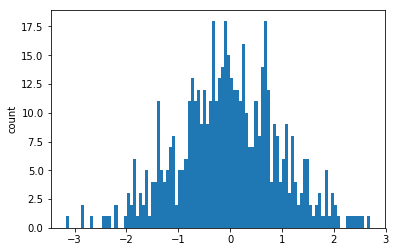

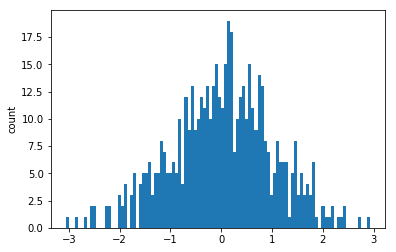

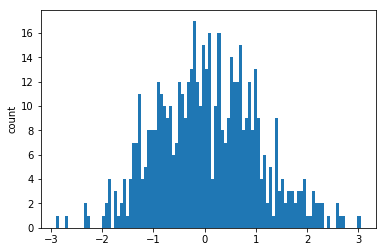

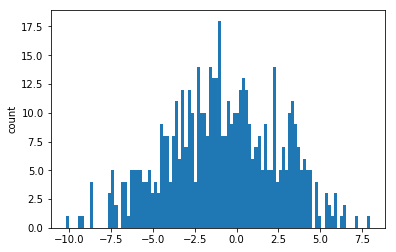

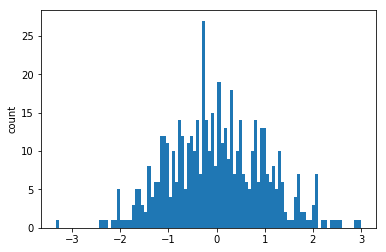

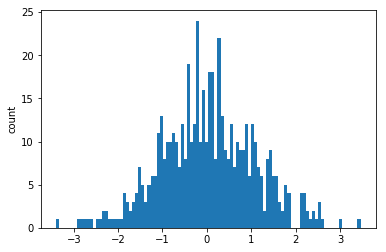

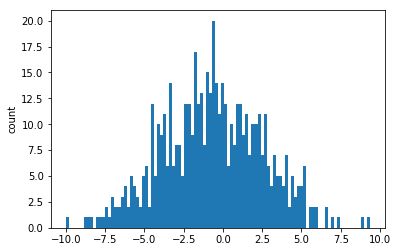

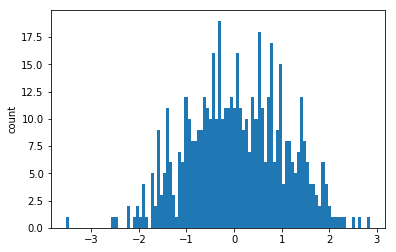

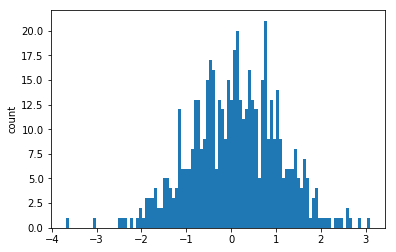

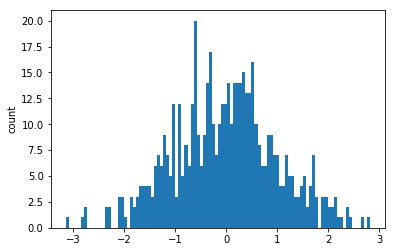

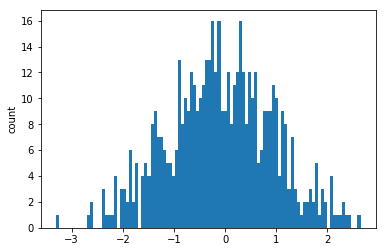

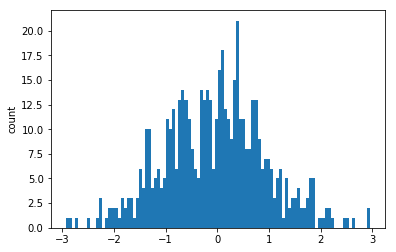

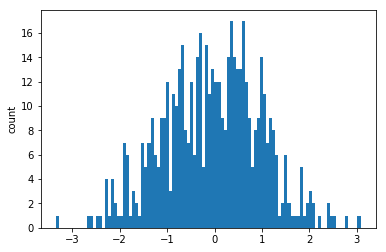

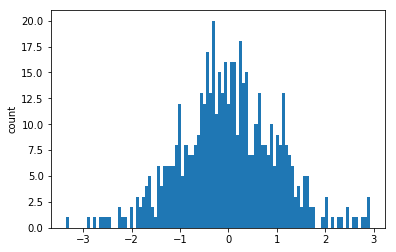

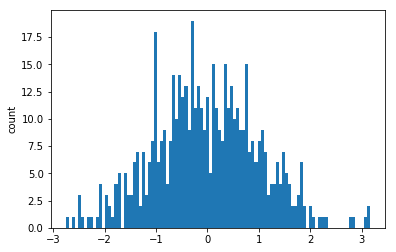

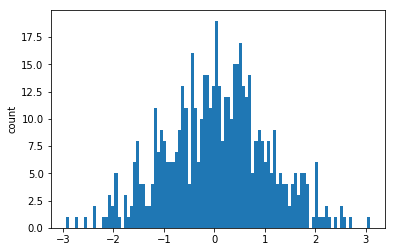

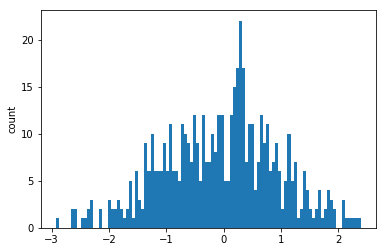

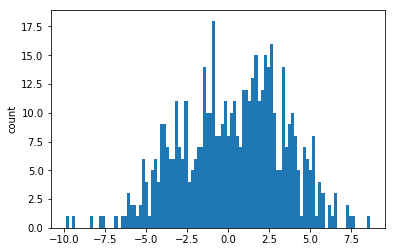

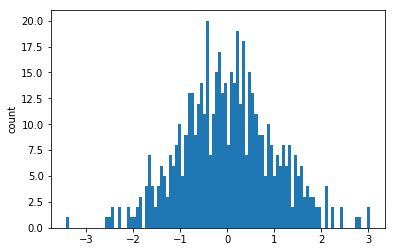

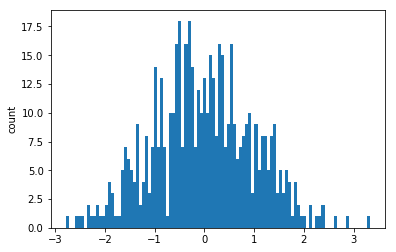

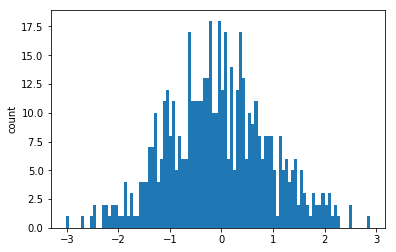

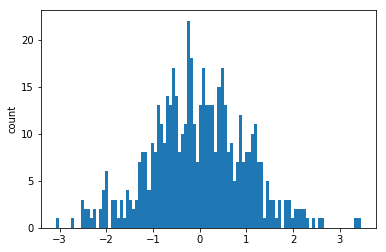

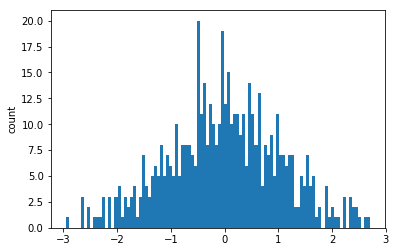

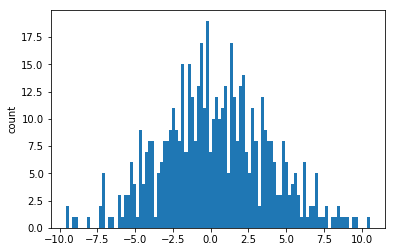

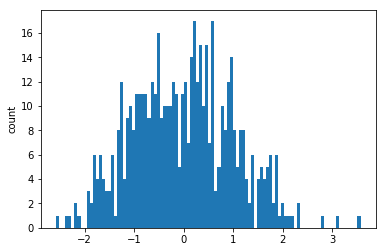

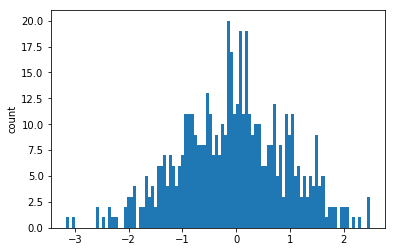

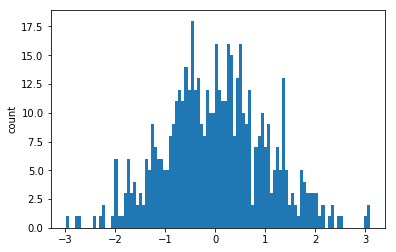

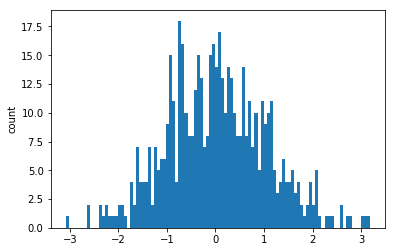

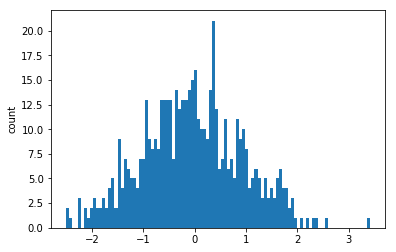

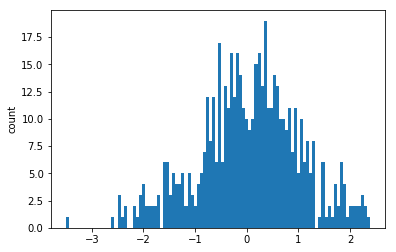

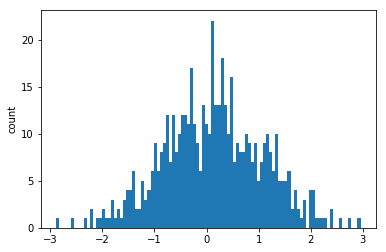

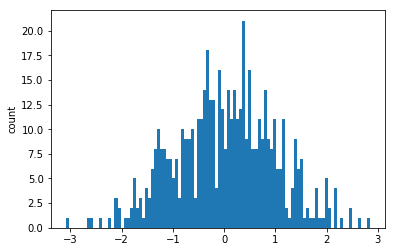

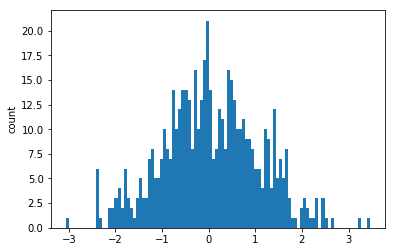

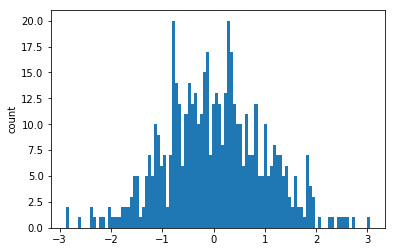

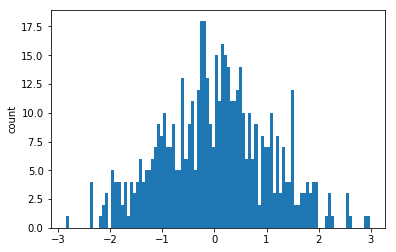

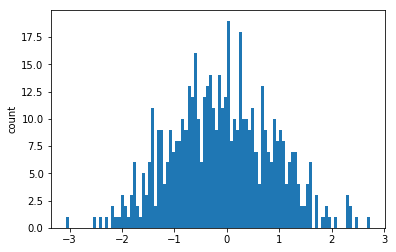

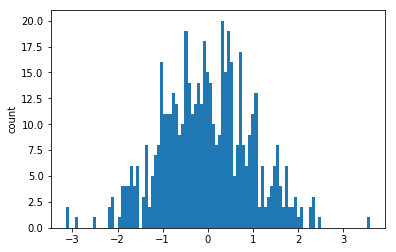

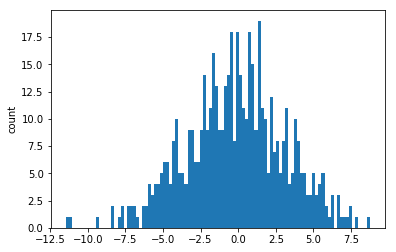

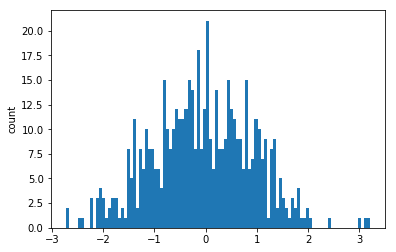

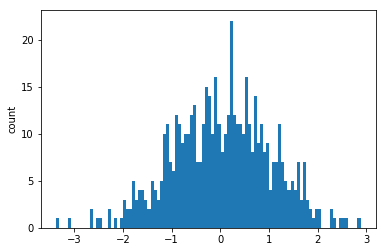

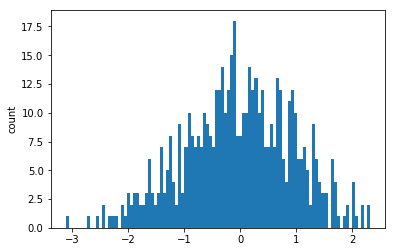

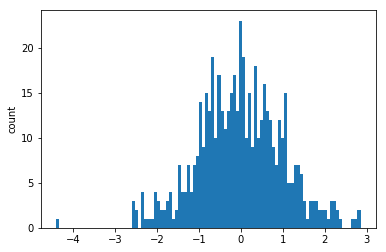

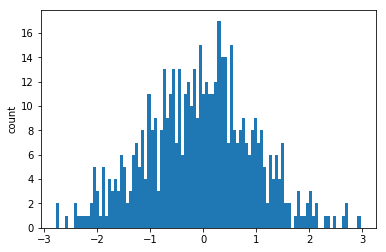

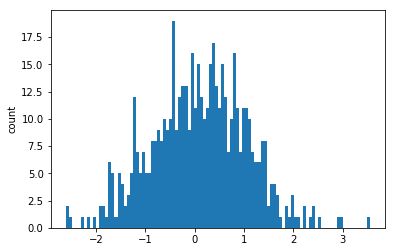

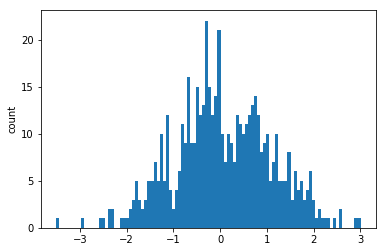

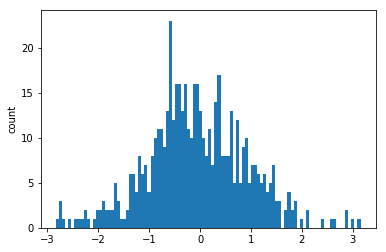

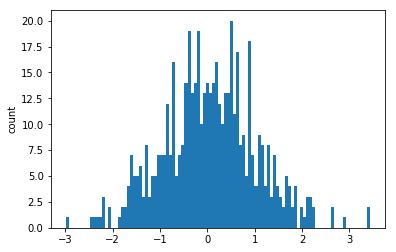

In [203]:
for col in var[200:len(var)]:
    plt.figure()
    plt.hist(b[col], bins=100)
    plt.ylabel('count')

In [ ]:
plt.matshow()
plt.show()

In [10]:
a = b[var].apply(np.std, 0)
col = a[a > 2].index
col

Index(['slimy-seashell-cassowary-goose',
       'snazzy-harlequin-chicken-distraction', 'frumpy-smalt-mau-ordinal',
       'ugly-tangerine-chihuahua-important', 'freaky-tan-angelfish-noise',
       'bluesy-brass-chihuahua-distraction', 'goopy-eggplant-indri-entropy',
       'homely-ruby-bulldog-entropy', 'dorky-tomato-ragdoll-dataset',
       'sunny-red-weasel-hint', 'wiggy-magnolia-wolfhound-sorted',
       'snappy-pear-quoll-unsorted', 'bluesy-amber-walrus-fepid',
       'baggy-champagne-capuchin-discard', 'greasy-rust-birman-kernel',
       'snazzy-cerise-donkey-distraction', 'lovely-sangria-koala-contributor',
       'flaky-brass-grasshopper-sorted', 'chummy-ruby-chinook-dataset',
       'cranky-champagne-jackal-gaussian', 'snazzy-purple-donkey-discard',
       'woolly-gold-millipede-fimbus', 'slimy-plum-cassowary-master',
       'ugly-tangerine-llama-goose', 'squirrely-apricot-goat-hint',
       'greasy-scarlet-paradise-goose', 'woolly-cinnabar-schnauzer-important',
       'shabby

In [50]:
X_train, X_val, y_train, y_val = train_test_split(b[var], #col
                                                    b['target'].values,
                                                    test_size=0.3
                                                  #,random_state=2019
                                                 )

# Random forest

In [269]:
rf1 = RandomForestClassifier(n_estimators=50,
                             max_depth=10,
                             n_jobs=-1)

In [270]:
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [271]:
roc_auc_score(y_val, rf1.predict_proba(X_val)[:,1])

0.835147247119078

# KNN

In [18]:
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline
#from sklearn.neighbors.nca import NeighborhoodComponentsAnalysis

In [34]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

## KNN

In [66]:
knn.fit(X_train, y_train) #[col]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
pred = knn.predict_proba(X_val)[:,1] #[col]

In [68]:
roc_auc_score(y_val, pred)

0.898968253968254

## KNN + NCA

In [69]:
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])

In [70]:
nca_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('nca',
                 NeighborhoodComponentsAnalysis(callback=None, init='auto',
                                                max_iter=50, n_components=None,
                                                random_state=42, tol=1e-05,
                                                verbose=0, warm_start=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [71]:
pred = nca_pipe.predict_proba(X_val)[:,1]

In [72]:
roc_auc_score(y_val, pred)

0.8835714285714286

# Discriminant Analysis

## LDA

In [153]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [182]:
lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.9)

In [183]:
lda.fit(X_train[col], y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.9,
                           solver='eigen', store_covariance=False, tol=0.0001)

In [184]:
pred = lda.predict_proba(X_val[col])[:,1]

In [185]:
roc_auc_score(y_val, pred)

0.7344444444444445

## QDA

In [74]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [161]:
qda = QuadraticDiscriminantAnalysis(reg_param=0.4)

In [162]:
qda.fit(X_train[col], y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.4,
                              store_covariance=False, tol=0.0001)

In [163]:
pred  = qda.predict_proba(X_val[col])[:,1]

In [164]:
#qda.predict_proba(X_val[col])[:,1]

In [165]:
roc_auc_score(y_val, pred)

0.9666666666666667

# PCA

In [187]:
from sklearn.decomposition import PCA

In [213]:
pca = PCA()

In [214]:
pca.fit(pd.concat([X_train[col], X_val[col]], axis=0))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [215]:
X_train_new = pca.transform(X_train[col])

In [216]:
X_train_new.shape

(368, 33)

In [217]:
pca.explained_variance_ / sum(pca.explained_variance_)

array([0.06840875, 0.06105233, 0.05456881, 0.05184226, 0.04681998,
       0.04517572, 0.04240087, 0.04061459, 0.03914548, 0.03693936,
       0.0362095 , 0.03578085, 0.03304145, 0.03225658, 0.03121625,
       0.02965543, 0.02803517, 0.02756012, 0.02596133, 0.02366235,
       0.02249475, 0.02178481, 0.02028428, 0.01947941, 0.01930018,
       0.01659916, 0.01629308, 0.01525439, 0.01395723, 0.01279501,
       0.01164306, 0.01086376, 0.00890371])

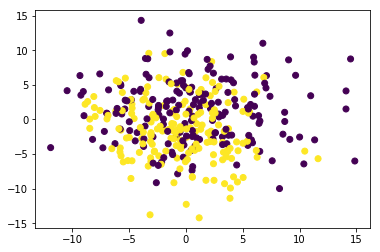

In [218]:
plt.scatter(x = X_train_new[:,3], y = X_train_new[:,2], c = y_train)

## + QDA

In [237]:
qda.fit(X_train_new[:,:25], y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.4,
                              store_covariance=False, tol=0.0001)

In [238]:
roc_auc_score(y_val, qda.predict_proba(pca.transform(X_val[col])[:,:25])[:,1])

0.9477777777777778

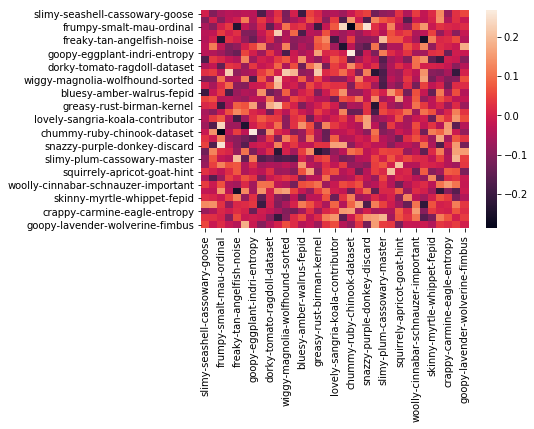

In [126]:
import seaborn as sns
#corr = b[var[0:100]].corr().replace(1,0)
#sns.heatmap(corr)

sns.heatmap(X_train[col].corr().replace(1,0))

In [148]:
X_train[var].iloc[1,:]

muggy-smalt-axolotl-pembus                   0.617124
dorky-peach-sheepdog-ordinal                -0.021426
slimy-seashell-cassowary-goose               3.249474
snazzy-harlequin-chicken-distraction         0.855917
frumpy-smalt-mau-ordinal                     0.274675
stealthy-beige-pinscher-golden               0.064326
chummy-cream-tarantula-entropy              -0.631363
hazy-emerald-cuttlefish-unsorted            -1.697098
nerdy-indigo-wolfhound-sorted                0.922218
leaky-amaranth-lizard-sorted                 0.386469
ugly-tangerine-chihuahua-important           8.011917
shaggy-silver-indri-fimbus                   0.404436
flaky-chocolate-beetle-grandmaster          -0.224061
squirrely-harlequin-sheep-sumble            -1.295738
freaky-tan-angelfish-noise                  -0.743498
lousy-plum-penguin-sumble                    0.179780
bluesy-rose-wallaby-discard                  1.208162
baggy-copper-oriole-dummy                    0.878402
stealthy-scarlet-hound-fepid

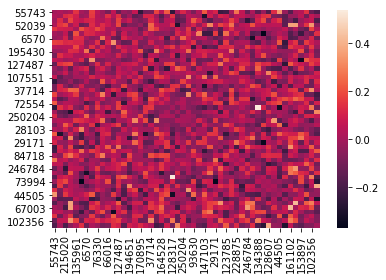

In [150]:
sns.heatmap(X_train[var][:50].transpose().corr().replace(1,0))

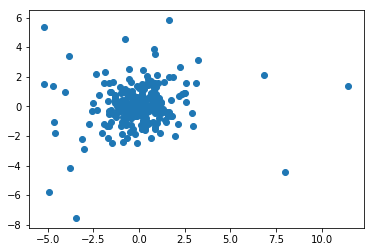

In [149]:
plt.scatter(x = X_train[var].iloc[1,:].values, y = X_train[var].iloc[2,:].values)

In [135]:
X_train.iloc[1,:].values

array([ 6.171240e-01, -2.142600e-02,  3.249474e+00,  8.559170e-01,
        2.746750e-01,  6.432600e-02, -6.313630e-01, -1.697098e+00,
        9.222180e-01,  3.864690e-01,  8.011917e+00,  4.044360e-01,
       -2.240610e-01, -1.295738e+00, -7.434980e-01,  1.797800e-01,
        1.208162e+00,  8.784020e-01, -4.773220e-01,  1.462856e+00,
        8.660280e-01, -9.024070e-01, -9.029200e-02,  9.859040e-01,
       -2.035590e-01,  1.114026e+00,  6.860766e+00, -3.257650e-01,
       -2.538743e+00,  3.682960e-01,  1.648337e+00,  2.326050e-01,
       -2.268950e-01, -7.554850e-01, -1.628517e+00, -1.873232e+00,
       -2.900160e-01, -7.832260e-01,  1.189547e+00, -1.540606e+00,
        1.650825e+00, -5.729990e-01,  8.254010e-01, -1.223142e+00,
       -2.044718e+00,  1.848256e+00, -5.951110e-01, -4.924693e+00,
       -2.090700e-01, -4.371040e-01,  4.266930e-01,  1.097331e+00,
       -9.753950e-01, -8.325370e-01,  7.560420e-01,  6.437480e-01,
       -5.533530e-01, -3.614470e-01, -2.725141e+00,  2.871900e

# Submission

In [ ]:
pred = rf1.predict_proba(test[var])[:,1]

In [ ]:
pd.DataFrame({'id': test['id.value'], 'target' : pred})